In [1]:
import pandas as pd 
import os, glob
import matplotlib.pyplot as plt 
import numpy as np
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [39]:
btc = pd.concat((pd.read_csv(f, engine="python") for f in glob.glob(r"gemini_BTCUSD_20[12][890]*.csv")), ignore_index=True)
eth = pd.concat((pd.read_csv(f, engine="python") for f in glob.glob(r"gemini_ETHUSD_20[12][890]*.csv")), ignore_index=True)

btc["Date"] = pd.to_datetime(btc["Date"], format="%Y-%m-%d %H:%M:%S")
eth["Date"] = pd.to_datetime(eth["Date"], format="%Y-%m-%d %H:%M:%S")

def compute_corr(time_window, eth, btc):
    eth = eth.resample(str(time_window) + "T", on="Date").agg({"Open": "first", "Close": "last", "Volume": np.sum, "High": np.max, "Low": np.min})
    btc = btc.resample(str(time_window) + "T", on="Date").agg({"Open": "first", "Close": "last", "Volume": np.sum, "High": np.max, "Low": np.min})

    eth = eth.add_prefix("eth_")
    btc = btc.add_prefix("btc_")

    df = pd.concat((btc, eth), axis=1, join="inner")
    df["eth_diff"] = (df["eth_Close"] - df["eth_Open"])/df["eth_Close"]
    df["btc_diff"] = (df["btc_Close"] - df["btc_Open"])/df["btc_Close"]
    return df["eth_diff"].shift(1).corr(df["btc_diff"])

windows = [1, 3, 5, 15, 30, 60, 120, 180, 240, 300, 360, 60*8, 60*12, 60*24, 60*36, 60*48,
          60*72, 60*24*5, 60*24*30]
correlations = [compute_corr(x, eth, btc) for x in windows]

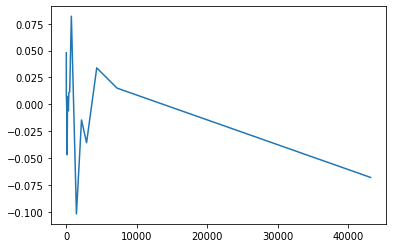

In [40]:
plt.plot(windows, correlations)

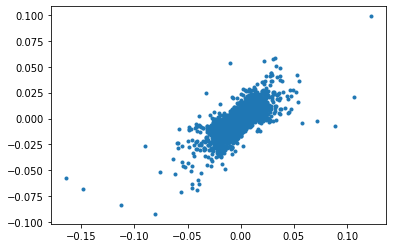

In [25]:
df["eth_diff"] = (df["eth_Close"] - df["eth_Open"])/df["eth_Close"]
df["btc_diff"] = (df["btc_Close"] - df["btc_Open"])/df["btc_Close"]
plt.plot(df["eth_diff"], df["btc_diff"], ".")
# plt.xLabel("ETH Diff")
# plt.yLabel("BTC Diff")
plt.show()

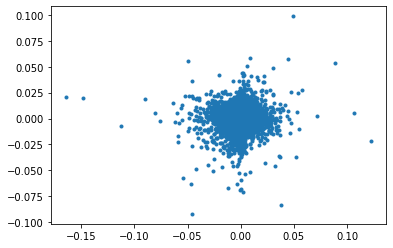

In [26]:
plt.plot(df["eth_diff"].shift(1), df["btc_diff"], ".")
# plt.set_xLabel("ETH Diff +1 Time Period")
# plt.set_yLabel("BTC Diff")
plt.show()

-0.0010378244061226456